In [3]:
import numpy as np, xarray as xr, matplotlib.pyplot as plt, pandas as pd, s3fs
from utils import *

s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", 
                       client_kwargs=dict(endpoint_url="https://rgw.met.no"))

In [2]:
tosBS = clip_to_region(get_bucket_data('tos', thing='Omon', model='NorESM2-LM', experiment='historical'))
SI = clip_to_region(get_bucket_data('siconc', thing='SImon', model='NorESM2-LM', experiment='historical'))

NameError: name 'get_monthly_bucket_data' is not defined

# Temperature

In [ ]:
tos_anomaly = time_anomaly(tosBS, 0, 12*30, -12*30, -1)
tos_anomaly.plot()

Found local areacello NetCDF


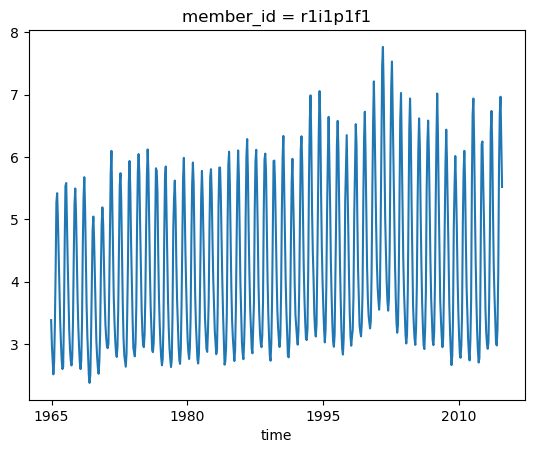

In [5]:
tosBSmean = regional_average(tosBS.tos.isel(time=slice(-12*70, -1)), model='NorESM2-LM')
tosBSmean.isel(time=slice(-12*50, -1)).plot(x='time')

# Sea Ice

In [ ]:
SImean = regional_average(SI, model='NorESM-LM')

SIMarch = SI.groupby('time.month')[3]
SIMarchSpatialMean = regional_average(SIMarch, areacello.areacello)

SISeptember = SI.groupby('time.month')[9]
SISeptemberSpatialMean = regional_average(SISeptember, areacello.areacello)

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,8))

SIMarchSpatialMean.isel(time=slice(-12*65, -1)).plot(ax=ax[0,0])
SISeptemberSpatialMean.isel(time=slice(-12*65, -1)).plot(ax=ax[0,1])

time_anomaly(SIMarch, 0, 12*30, -12*30, -1).plot(ax=ax[1,0])
time_anomaly(SISeptember, 0, 12*30, -12*30, -1).plot(ax=ax[1,1])

plt.show()

In [ ]:
SImeanMarch = SImean.groupby('time.month')[3]
SImeanSeptember = SImean.groupby('time.month')[9]
SImeanMarch.plot()
SImeanSeptember.plot()

# Chlorofyll

In [7]:
chlos = clip_to_region(get_bucket_data('chlos', time_res='daily', thing='Oday', 
                                       experiment='historical', last_n_files=1))
chlos_mean = regional_average(chlos)

Request: s3://escience2022/Ada/daily/chlos_Oday_NorESM2-LM_historical_*.nc
Found local areacello NetCDF


TypeError: unhashable type: 'numpy.ndarray'

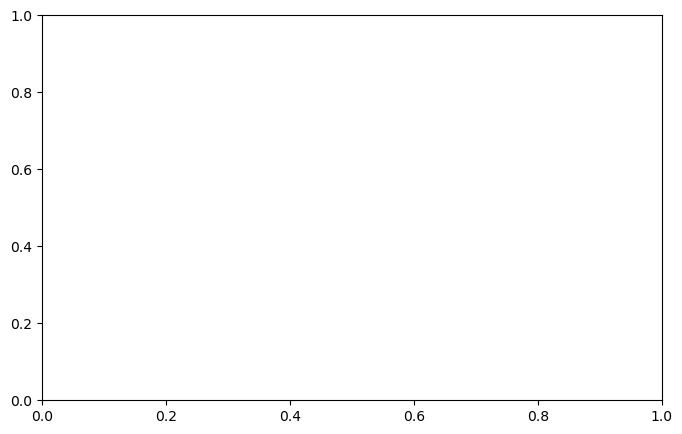

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))
chlos_mean.chlos.isel(time=slice(-365, -1)).plot(x=np.arange(365), ax=ax, color='r', label='2014')
#chlos_mean.chlos.isel(time=slice(-2*365, -365)).plot(x='time.day', ax=ax, color='g', label='2013')
#chlos_mean.chlos.isel(time=slice(-3*365, -2*365)).plot(ax=ax, color='b', label='2012')
#chlos_mean.chlos.isel(time=slice(-4*365, -3*365)).plot(ax=ax, color='y', label='2011')
ax.legend()
plt.show()

månedlig noresm chlos for å se peak, plotte oppå /OBS-ESACCI-OC/